# 基於密度之含噪空間聚類法(Density-Based Spatial Clustering of Applications with Noise)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# MNIST Dataset

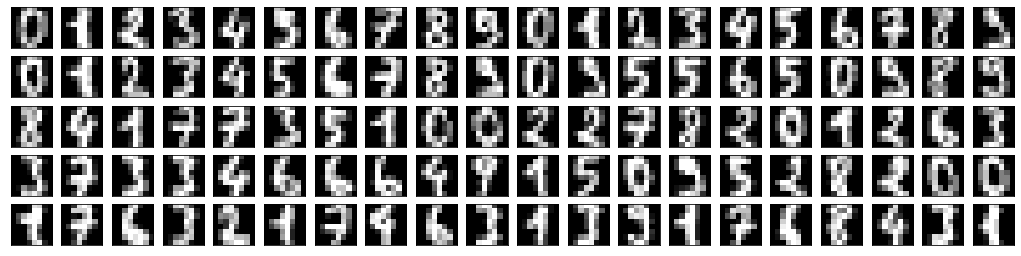

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=(digits.data/16)
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Radius Nearest Neighbor

In [4]:
def RadiusNN(i_dist,eps):
    return np.array(np.where(i_dist<=eps)).flatten()

# Expand Cluster

In [5]:
def expandcluster(i,NN_index,C,dist,check_list,cluster,eps,MinPts):
    cluster[i]=C
    for j in NN_index:
        if(check_list[j]==0):
            check_list[j]=1
            tmp_NN_index=RadiusNN(dist[j],eps)
            if(len(tmp_NN_index)>=MinPts):
                set_diff_index=np.setdiff1d(tmp_NN_index,NN_index)
                NN_index=np.append(NN_index,set_diff_index)
        if(cluster[j]==-1):
            cluster[j]=C

# DBSCAN

In [6]:
from scipy.spatial.distance import cdist
N,M=X.shape
eps=2.2
MinPts=5
C=-1
cluster=np.ones(N,dtype=int)*-1
check_list=np.zeros(N,dtype=int)
dist = cdist(X,X,"euclidean")
for i in range(N):
    if(check_list[i]!=0):
        continue
    check_list[i]=1
    NN_index=RadiusNN(dist[i],eps)
    if(len(NN_index)<MinPts):
        check_list[i]=2
    else:
        C+=1
        expandcluster(i,NN_index,C,dist,check_list,cluster,eps,MinPts)
print(max(cluster))

70


# Plot

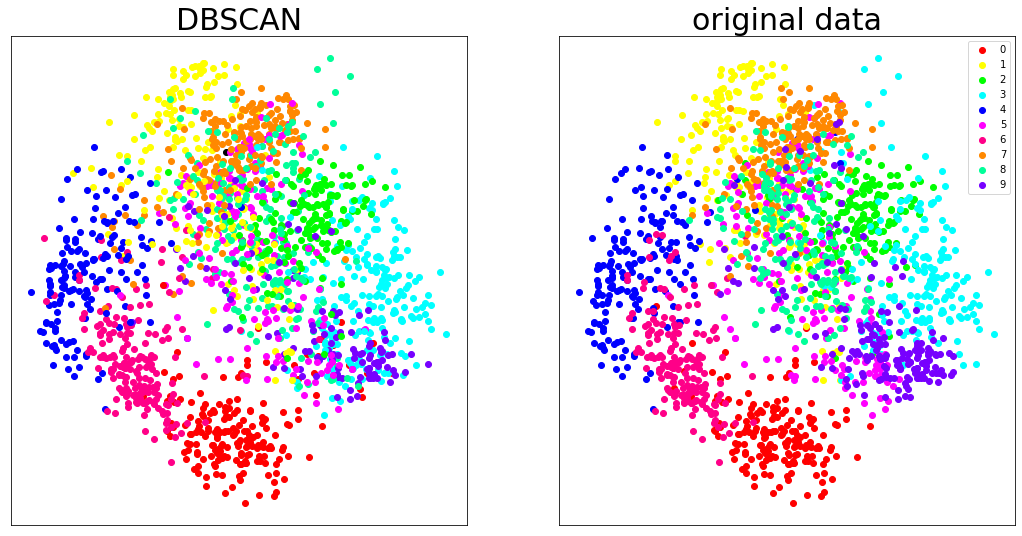

In [8]:
X_embedded=PCA(X,2,N)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF","#000000"]
plt.rcParams["figure.figsize"] = (18,9)
fig , ax = plt.subplots()
plt.subplot(1, 2, 1)
for i in range(-1,max(cluster)):
    BOOL=(cluster==i)
    if(i==-1):
        j=10
    else:
        j=np.argmax(np.bincount(y[BOOL]))
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[j])
plt.title("DBSCAN",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
for i in range(0,10):
    plt.scatter(X_embedded[(y==i),0],X_embedded[(y==i),1],c=color[i],label=i)
plt.title("original data",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()